<a href="https://colab.research.google.com/github/Awais-Anwer/semester-project/blob/main/Skin_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from pathlib import Path
import random
import glob
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Loading Data

In [2]:
!unzip /content/drive/MyDrive/CVision/skin-disease-dataset.zip

Archive:  /content/drive/MyDrive/CVision/skin-disease-dataset.zip
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (1).webp  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (104).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (106).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (115).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (119).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (124).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (135).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (139).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (144).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (147).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (

In [3]:
train_dir = '/content/skin-disease-datasaet/train_set'
test_dir = '/content/skin-disease-datasaet/test_set'

# Initialize counters
total_train_images = 0
total_test_images = 0

for category in os.listdir(train_dir):
  category_dir = os.path.join(train_dir, category)
  num_images = len(os.listdir(category_dir))
  print(f"Train - {category}: {num_images} images")
  total_train_images += num_images


for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir, category)
  num_images = len(os.listdir(category_dir))
  print(f"Test - {category}: {num_images} images")
  total_test_images += num_images

Train - FU-nail-fungus: 129 images
Train - PA-cutaneous-larva-migrans: 100 images
Train - FU-ringworm: 90 images
Train - BA- cellulitis: 136 images
Train - VI-shingles: 130 images
Train - BA-impetigo: 80 images
Train - VI-chickenpox: 136 images
Train - FU-athlete-foot: 124 images
Test - FU-nail-fungus: 33 images
Test - PA-cutaneous-larva-migrans: 25 images
Test - FU-ringworm: 23 images
Test - BA- cellulitis: 34 images
Test - VI-shingles: 33 images
Test - BA-impetigo: 20 images
Test - VI-chickenpox: 34 images
Test - FU-athlete-foot: 32 images


In [4]:
print(f"Total Train images: {total_train_images}")
print(f"Total Test images: {total_test_images}")

Total Train images: 925
Total Test images: 234


# Data Visualization

Train Set

In [5]:
# Train set classes
classes = os.listdir("/content/skin-disease-datasaet/train_set")
print(f"Total Classes = {len(classes)}")
print(f"Classes: {classes}")

Total Classes = 8
Classes: ['FU-nail-fungus', 'PA-cutaneous-larva-migrans', 'FU-ringworm', 'BA- cellulitis', 'VI-shingles', 'BA-impetigo', 'VI-chickenpox', 'FU-athlete-foot']


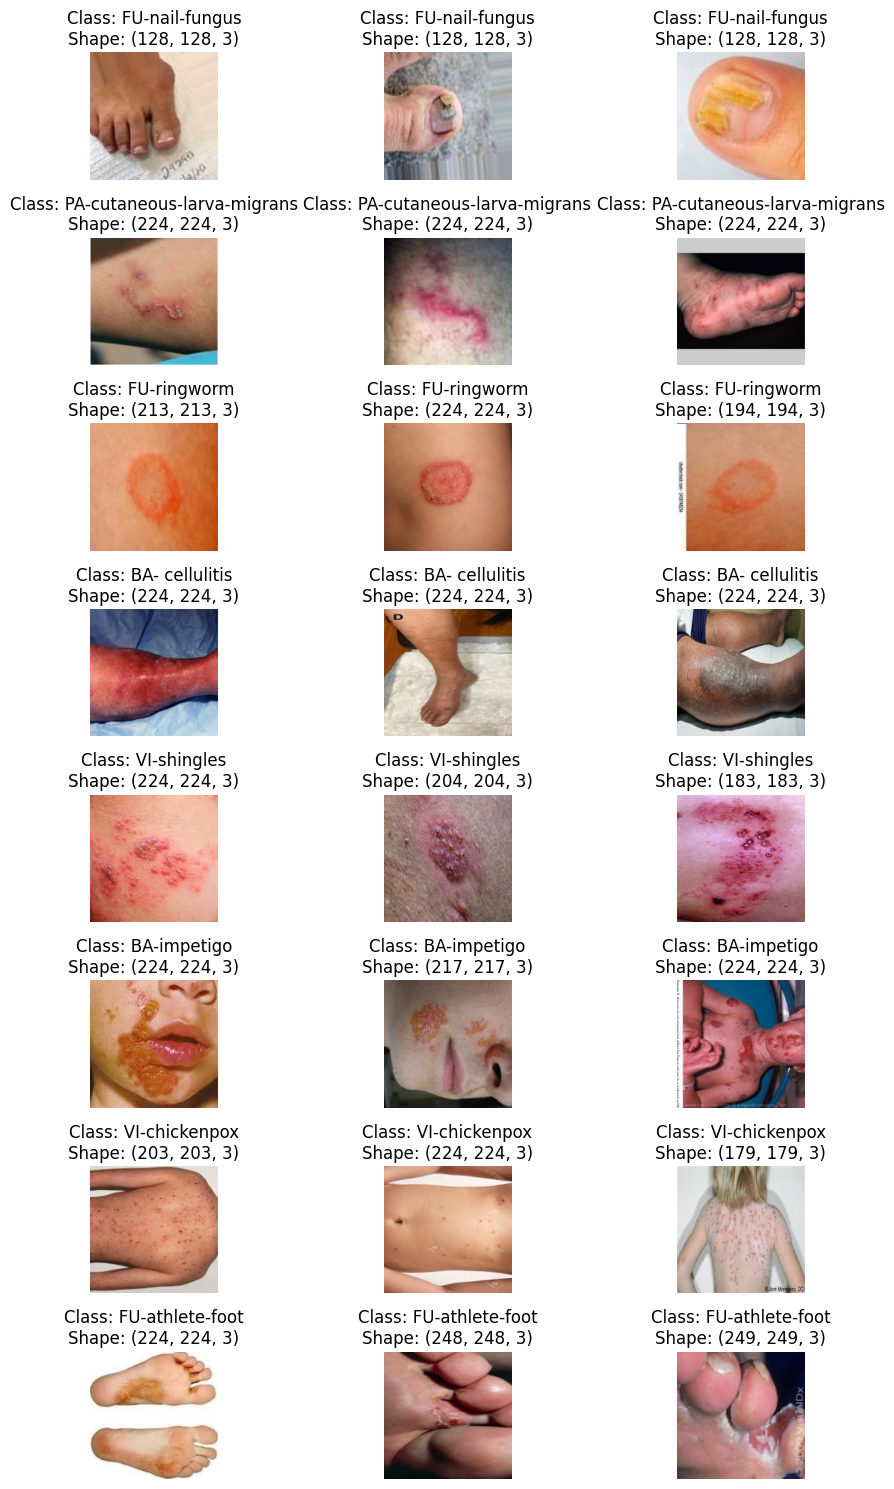

In [27]:
NUM_IMAGES = 3

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10, 15))

row = 0
for c in classes:
  img_path_class = list(Path(os.path.join(train_dir, c)).glob("*.jpg"))
  img_selected = random.choices(img_path_class, k = NUM_IMAGES)

  for i, j in enumerate(img_selected):
    img_bgr = cv2.imread(str(j))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    ax[row, i].imshow(img_rgb)
    ax[row, i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
    ax[row, i].axis("off")
  row += 1

fig.tight_layout()
fig.show()

Test Set

In [30]:
# test set classes
classes = os.listdir(test_dir)
print(f"Total classes: {len(classes)}")
print(f"Classes: {classes}")

Total classes: 8
Classes: ['FU-nail-fungus', 'PA-cutaneous-larva-migrans', 'FU-ringworm', 'BA- cellulitis', 'VI-shingles', 'BA-impetigo', 'VI-chickenpox', 'FU-athlete-foot']


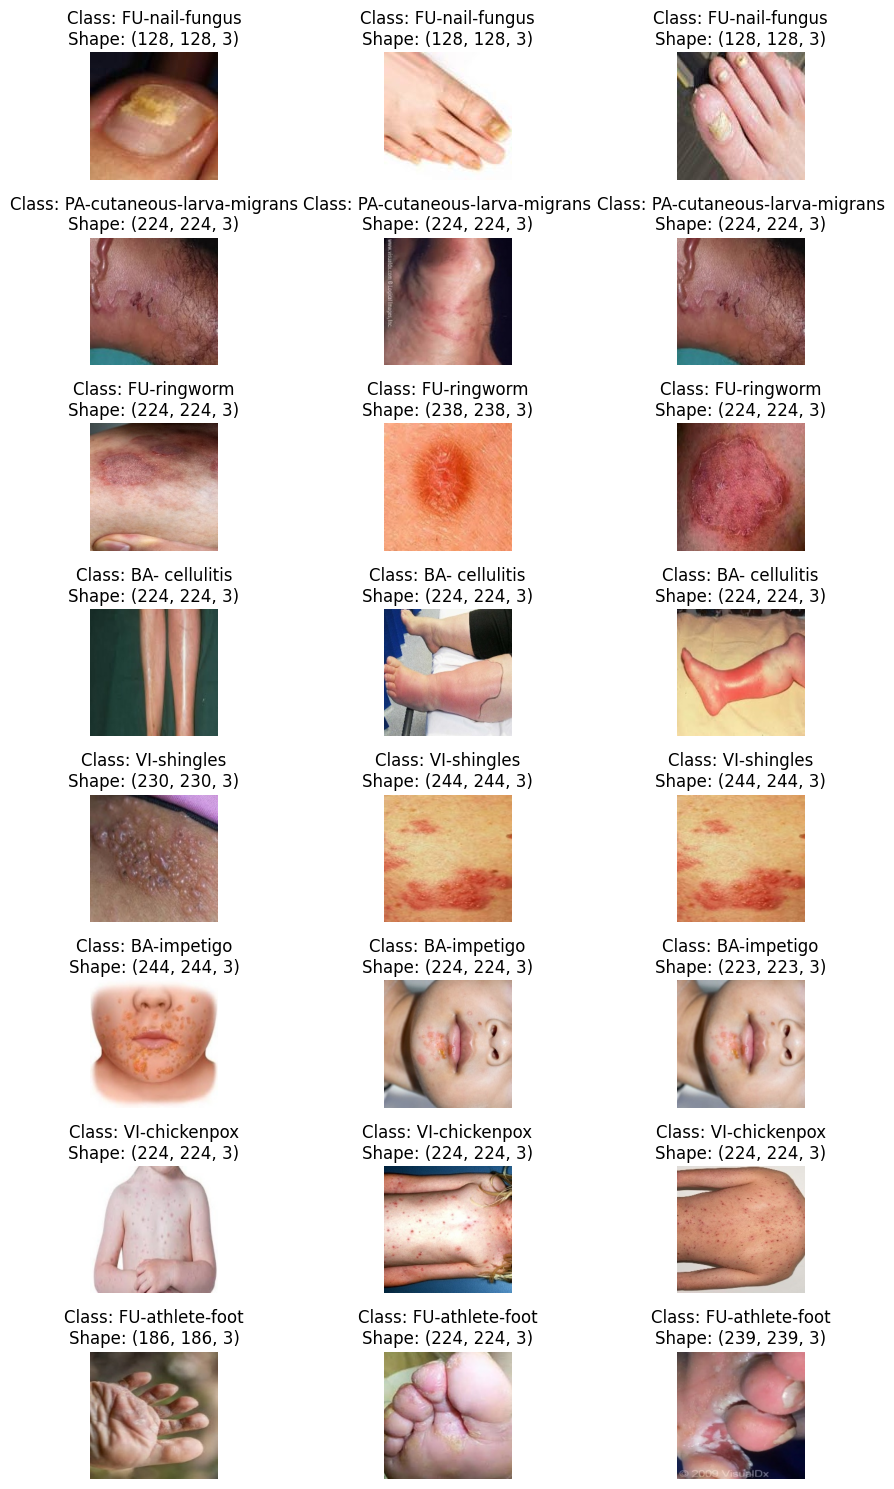

In [42]:
NUM_IMAGES = 3
fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10, 15))

row = 0
for c in classes:
  image_path_class = list(Path(os.path.join(test_dir, c)).glob('*.jpg'))
  image_selected = random.choices(image_path_class, k=NUM_IMAGES)

  for i, image in enumerate(image_selected):
     img_bgr = cv2.imread(str(image))
     img_rgb = cv2.cvtColor(img_bgr, cv2. COLOR_BGR2RGB)
     ax[row, i].imshow(img_rgb)
     ax[row, i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
     ax[row, i].axis("off")
  row += 1

fig.tight_layout()
fig.show()

# Data Preprocessing

### Train Data

In [28]:
data_dir=Path(train_dir)
disease_images_train_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
}

In [8]:
disease_train_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7
}

In [9]:
IMG_SIZE = 10

x_train = []
y_train = []

for image_name, image_paths in disease_images_train_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(IMG_SIZE, IMG_SIZE))
        x_train.append(image_resize)
        y_train.append(disease_train_label_dic[image_name])

In [10]:
x_train[0].shape

(10, 10, 3)

In [11]:
len(x_train)

925

In [12]:
len(y_train)

925

In [13]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train.shape

(925,)

### Test Data

In [14]:
data_dir=pathlib.Path(test_dir)
disease_images_test_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
}
disease_test_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
}

In [15]:
IMG_SIZE = 10
x_test = []
y_test = []

for image_name, image_paths in disease_images_test_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(IMG_SIZE, IMG_SIZE))
        x_test.append(image_resize)
        y_test.append(disease_test_label_dic[image_name])

In [16]:
x_test=np.array(x_test)
y_test=np.array(y_test)
y_test.shape

(234,)

In [17]:
x_test.shape

(234, 10, 10, 3)

In [ ]:
x_test[0]

In [19]:
from sklearn.manifold import TSNE

# Reshape the array to (925, 300) as each image has 10x10x3 attributes
images_array_reshaped = x_train.reshape(925, -1)
# Convert the reshaped array to a pandas DataFrame
df = pd.DataFrame(images_array_reshaped)
df.shape

(925, 300)

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,2,4,5,2,4,5,2,4,5,2,...,5,7,8,6,7,7,7,5,5,5
1,136,119,63,95,78,33,112,105,96,200,...,65,22,36,55,12,20,37,19,29,47
2,245,245,245,247,247,247,250,250,250,250,...,204,58,124,195,43,106,175,43,97,157
3,19,17,17,19,17,16,17,15,14,18,...,16,26,19,12,29,21,14,33,23,16
4,32,47,73,197,206,214,209,220,224,228,...,155,191,186,183,228,227,223,150,151,149


In [21]:
# Initialize t-SNE with 10 components for 2D visualization
tsne = TSNE(n_components=10, method = 'exact', random_state=42)

# Fit and transform the data
tsne_data = tsne.fit_transform(images_array_reshaped)

# Convert the t-SNE result to a DataFrame
tsne_df = pd.DataFrame(tsne_data)
tsne_df.shape


(925, 10)

In [22]:
tsne_df.head()

,0,1,2,3,4,5,6,7,8,9
0,6.164102,-0.273587,0.195430,6.745764,-3.927703,1.019095,-0.391912,0.006758,0.114090,2.327738
1,7.047503,-2.396599,0.751611,-0.036895,0.036043,0.514329,1.242879,1.759628,0.272786,0.268450
2,-12.403079,-3.525096,2.022099,0.351007,3.165192,1.847297,0.025710,-0.147156,-1.451046,0.506164
3,7.012209,2.366822,-1.865993,7.095378,-4.180320,-0.627063,-0.009696,0.042088,0.352730,0.918908
4,-2.957745,-0.383292,-0.229355,-3.001843,1.591252,1.603918,0.841228,-1.504705,1.700974,-2.698370


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataset
scaled_data = scaler.fit_transform(tsne_df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=tsne_df.columns)

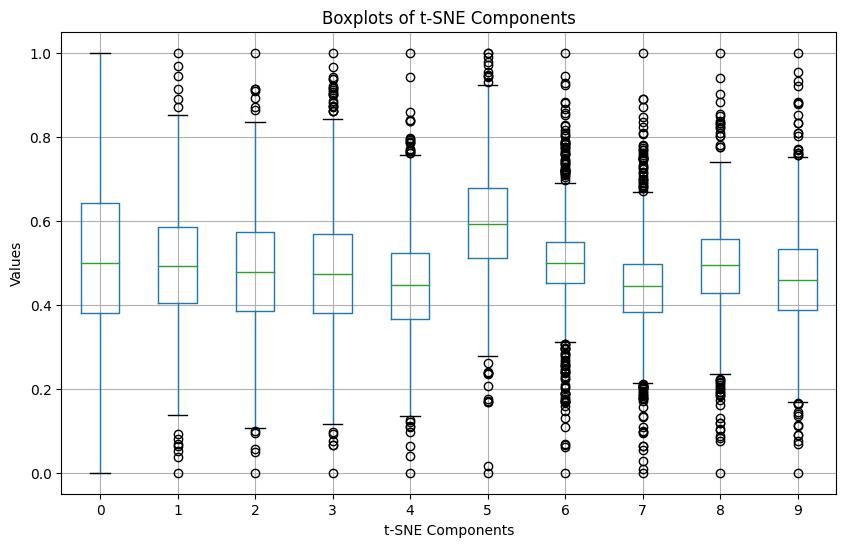

In [24]:
# Plot the t-SNE result
plt.figure(figsize=(10, 6))
scaled_df.boxplot()
plt.title('Boxplots of t-SNE Components')
plt.xlabel('t-SNE Components')
plt.ylabel('Values')

# Save the figure
plt.savefig('boxplots_figure.png')

plt.show()

## New - Data Preprocessing

In [52]:
X_train = []
y_train = []

# laod images and labels
for image_name, image_paths in disease_images_train_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        X_train.append(img)
        y_train.append(disease_train_label_dic[image_name])

# convert list to numpy arrays
X_train = np.array(x_train)
y_train = np.array(y_train)

# normalize pixel values
X_train = X_train.astype('float32')/255

print(f"Train images shape: {X_train.shape}")
print(f"Train labels shape: {y_train.shape}")

Train images shape: (925, 150, 150, 3)
Train labels shape: (925,)


In [60]:
# rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 924 images belonging to 8 classes.


In [62]:
for data_batch, labels_batch in train_generator:
  print(f"Data batch shape: {data_batch.shape}")
  print(f"Labels batch shape: {labels_batch.shape}")
  break

Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 8)


In [68]:
batch_images, batch_labels = next(train_generator)

In [67]:
integer_labels = tf.argmax(batch_labels, axis=1)

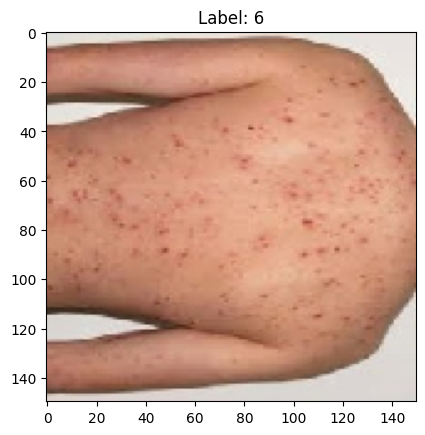

In [73]:
plt.imshow(batch_images[0])
plt.title(f"Label: {integer_labels[0]}")
plt.show()

In [74]:
# For test set

# rescale image by 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # resize images
    batch_size = 20,
    class_mode = "categorical"
)

Found 233 images belonging to 8 classes.


In [75]:
test_images, test_labels = next(test_generator)

In [76]:
integer_labels = tf.argmax(test_labels, axis=1)

# Model Building

In [78]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

# Model Training

In [82]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'], run_eagerly=True
)

In [83]:
history = model.fit(
    train_generator,
    epochs=25,
    batch_size=15,
)

Epoch 1/25
29/29 [==============================] - 5s 106ms/step - loss: 2.0642 - accuracy: 0.1299
Epoch 2/25
29/29 [==============================] - 2s 80ms/step - loss: 2.0642 - accuracy: 0.1255
Epoch 3/25
29/29 [==============================] - 2s 82ms/step - loss: 2.0639 - accuracy: 0.1374
Epoch 4/25
29/29 [==============================] - 3s 105ms/step - loss: 2.0641 - accuracy: 0.1374
Epoch 5/25
29/29 [==============================] - 3s 85ms/step - loss: 2.0645 - accuracy: 0.1180
Epoch 6/25
29/29 [==============================] - 2s 82ms/step - loss: 2.0643 - accuracy: 0.1364
Epoch 7/25
29/29 [==============================] - 2s 81ms/step - loss: 2.0133 - accuracy: 0.1883
Epoch 8/25
29/29 [==============================] - 2s 83ms/step - loss: 1.9714 - accuracy: 0.1959
Epoch 9/25
29/29 [==============================] - 3s 106ms/step - loss: 1.9016 - accuracy: 0.2273
Epoch 10/25
29/29 [==============================] - 2s 81ms/step - loss: 1.8254 - accuracy: 0.2749
Epoch 

In [84]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

1/1 [==============================] - 1s 805ms/step - loss: 1.3248 - accuracy: 0.8000


In [85]:
# Saving only the model weights to a file
model.save_weights("my_model_weights.h5")